In [1]:
import os
cwd = os.getcwd()
print(cwd)

/Users/sandeepgautam/Desktop


In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('/Users/sandeepgautam/Desktop/train (2).csv')
df=df.replace('?',np.nan)
df.head()
df['Age']=pd.to_numeric(df['Age'])
df['myocardial']=pd.to_numeric(df['myocardial'])
df['Potassium']=pd.to_numeric(df['Potassium'])
df['Sodium']=pd.to_numeric(df['Sodium'])
df['AlAT']=pd.to_numeric(df['AlAT'])
df['AsAT']=pd.to_numeric(df['AsAT'])
df['WBC']=pd.to_numeric(df['WBC'])
df['ESR']=pd.to_numeric(df['ESR'])
df['Time']=pd.to_numeric(df['Time'])


In [4]:
df.Age.replace(999,np.nan,inplace=True)

### Solving null value problem of Age column with the help of Gender   Columns 


In [5]:
df.groupby('Gender').median()

,Age,myocardial,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
Gender,,,,,,,,,,
Female,68.0,0.0,4.0,136.0,0.38,0.22,8.1,14.0,4.0,0
Male,59.0,0.0,4.2,136.0,0.38,0.22,8.1,8.0,4.0,0


In [6]:
df['Age']=df.groupby("Gender")['Age'].transform(lambda x: x.fillna(x.median()))

In [7]:
df[df.Age==999]

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Heredity,Hypertension,Symptomatic hypertension,Duration,...,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome


*  To check how many rows have different number of nan. value in total columns


In [8]:

for i in range(22):
    print("For columns"+str(i))
    print(df[df.isnull().sum(axis=1) >i].shape[0])

For columns0
1267
For columns1
1051
For columns2
978
For columns3
604
For columns4
453
For columns5
236
For columns6
160
For columns7
74
For columns8
53
For columns9
23
For columns10
17
For columns11
4
For columns12
1
For columns13
1
For columns14
0
For columns15
0
For columns16
0
For columns17
0
For columns18
0
For columns19
0
For columns20
0
For columns21
0


### We choose threshold of 6, so for those rows that have more than 6 null columns ,we remove the whole rows

In [9]:
a=df[df.isnull().sum(axis=1) >6].index

In [10]:
df=df.drop(df.index[a])


In [11]:
df.shape

(1115, 23)

In [12]:
df.isnull().sum().sum()

3629

### Removing Heredity,Systolic_emergency and Diastolic_emergency as it has a lot of nan values

In [13]:
df=df.drop('Heredity',axis=1)
df=df.drop('Systolic_emergency',axis=1)
df=df.drop('Diastolic_emergency',axis=1)

In [14]:
df.isnull().sum().sum()

1232

In [15]:
df.isnull().sum()

Age                           0
Gender                        0
myocardial                    0
Exertional angina            51
FC                           30
Heart Disease                25
Hypertension                  0
Symptomatic hypertension      0
Duration                    155
Arrhythmia                    4
Systolic_intensive_care     143
Diastolic_intensive_care    143
Potassium                   158
Sodium                      159
AlAT                         99
AsAT                        100
WBC                          24
ESR                          73
Time                         68
Outcome                       0
dtype: int64

In [16]:
df['myocardial']=pd.to_numeric(df['myocardial'])
df['Age']=pd.to_numeric(df['Age'])
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
df.head()

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
0,75.0,0,0.0,Two years ago,II FC,Exertional angina,Stage 2,No,NaN,No,140,90,NaN,NaN,0.30,0.18,7.8,16.0,7.0,0
1,50.0,1,1.0,Two years ago,II FC,Unstable angina,Stage 2,No,One year,No,NaN,NaN,3.9,132.0,0.23,0.52,6.2,20.0,7.0,0
4,76.0,0,3.0,Never,No angina,Unstable angina,Stage 2,No,More than 10 years,No,110,70,NaN,NaN,0.15,0.26,4.0,5.0,7.0,0
5,54.0,1,0.0,Never,No angina,No angina,No,No,No hypertension,No,NaN,NaN,5.3,139.0,0.15,0.11,6.8,30.0,2.0,0
7,63.0,1,0.0,Never,No angina,No angina,No,No,No hypertension,No,110,70,4.4,141.0,1.96,0.86,7.7,3.0,8.0,0


In [17]:
# check to check if there is relationship between age and various variables- 

a=[]
for i in df['Age']:
    if i<=40:
        a.append(0)
    elif i>=60:
        a.append(2)
    else:
        a.append(1)
df['temp']=a
df.head()

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,...,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome,temp
0,75.0,0,0.0,Two years ago,II FC,Exertional angina,Stage 2,No,NaN,No,...,90,NaN,NaN,0.30,0.18,7.8,16.0,7.0,0,2
1,50.0,1,1.0,Two years ago,II FC,Unstable angina,Stage 2,No,One year,No,...,NaN,3.9,132.0,0.23,0.52,6.2,20.0,7.0,0,1
4,76.0,0,3.0,Never,No angina,Unstable angina,Stage 2,No,More than 10 years,No,...,70,NaN,NaN,0.15,0.26,4.0,5.0,7.0,0,2
5,54.0,1,0.0,Never,No angina,No angina,No,No,No hypertension,No,...,NaN,5.3,139.0,0.15,0.11,6.8,30.0,2.0,0,1
7,63.0,1,0.0,Never,No angina,No angina,No,No,No hypertension,No,...,70,4.4,141.0,1.96,0.86,7.7,3.0,8.0,0,2


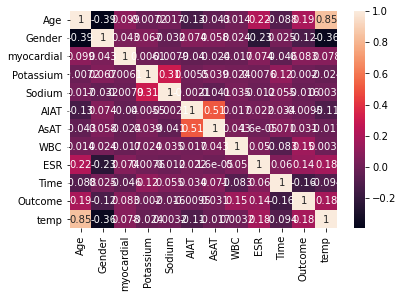

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()



### 1. Solving null value problem of Age column with the help of Gender Columns 


In [19]:
# 1st null value 
df['Age']=df.groupby("Gender")['Age'].transform(lambda x: x.fillna(x.median()))

In [20]:
import seaborn as sns
sns.set_theme(style="whitegrid")
df['Arrhythmia']=np.where(df['Arrhythmia']=='Yes',1,0)

In [21]:
df.isna().sum()

Age                           0
Gender                        0
myocardial                    0
Exertional angina            51
FC                           30
Heart Disease                25
Hypertension                  0
Symptomatic hypertension      0
Duration                    155
Arrhythmia                    0
Systolic_intensive_care     143
Diastolic_intensive_care    143
Potassium                   158
Sodium                      159
AlAT                         99
AsAT                        100
WBC                          24
ESR                          73
Time                         68
Outcome                       0
temp                          0
dtype: int64

In [22]:
df.groupby(['Exertional angina']).mean()

,Age,Gender,myocardial,Arrhythmia,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome,temp
Exertional angina,,,,,,,,,,,,,
During the last year,60.562500,0.635417,0.479167,0.010417,4.098718,135.884615,0.491071,0.251429,9.298925,12.459770,4.922222,0.135417,1.541667
Four to five years ago,62.913580,0.604938,0.802469,0.061728,4.276812,136.811594,0.416184,0.240789,9.326582,16.013889,4.727273,0.197531,1.629630
More than five years ago,65.857143,0.562500,0.986607,0.031250,4.192222,136.226519,0.435419,0.242857,8.635780,13.604762,4.728155,0.232143,1.758929
Never,59.022075,0.684327,0.218543,0.006623,4.223134,136.783042,0.515181,0.282681,8.881655,12.793911,4.689977,0.094923,1.445916
One year ago,62.897727,0.579545,0.829545,0.079545,4.164000,136.520000,0.438354,0.256329,8.608140,13.951220,4.567901,0.090909,1.659091
Three years ago,61.586957,0.630435,0.695652,0.065217,4.205128,136.025641,0.425135,0.240811,7.865217,14.488889,4.857143,0.086957,1.608696
Two years ago,61.210526,0.657895,0.657895,0.039474,4.191045,136.447761,0.474583,0.263611,9.201389,12.956522,3.875000,0.223684,1.578947


### Changing Exertional angina columns into ordinal data where Never=6 and One year ago=1(Other values are in between)

In [23]:
df['Exertional angina'].replace('During the last year',0,inplace=True)
df['Exertional angina'].replace('One year ago',1,inplace=True)
df['Exertional angina'].replace('Two years ago',2,inplace=True)
df['Exertional angina'].replace('Three years ago',3,inplace=True)
df['Exertional angina'].replace('Four to five years ago',4,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('Never',6,inplace=True)




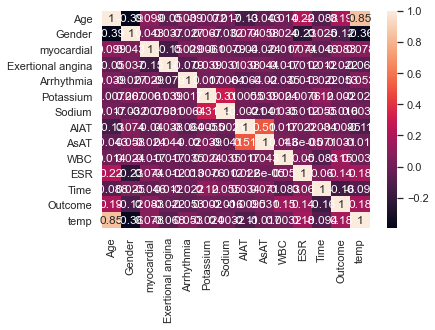

In [24]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='myocardial', ylabel='Exertional angina'>

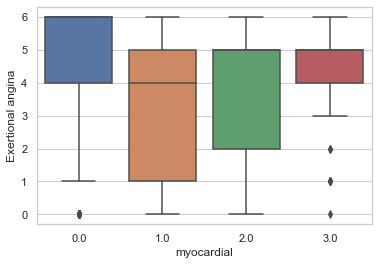

In [25]:
sns.boxplot(y="Exertional angina", x="myocardial", data=df)

### Solving null value problem of Exertional angina column with the help of myocardial  Column


In [26]:
# The median value of each group of myocardial will be used to put the values in Exertional angina's null value
df['Exertional angina']=df.groupby(['myocardial'])['Exertional angina'].transform(lambda x: x.fillna(x.median()))


In [27]:
df['Duration'].replace('One year',0,inplace=True)
df['Duration'].replace('Two years',1,inplace=True)
df['Duration'].replace('Three years',2,inplace=True)
df['Duration'].replace('Four years',3,inplace=True)
df['Duration'].replace('Five years',4,inplace=True)
df['Duration'].replace('Six to ten years',5,inplace=True)
df['Duration'].replace('More than 10 years',6,inplace=True)
df['Duration'].replace('No hypertension',7,inplace=True)

df.Duration.value_counts()

7.0    342
6.0    291
5.0    118
0.0     61
4.0     52
2.0     42
1.0     38
3.0     16
Name: Duration, dtype: int64

<AxesSubplot:xlabel='Hypertension', ylabel='Duration'>

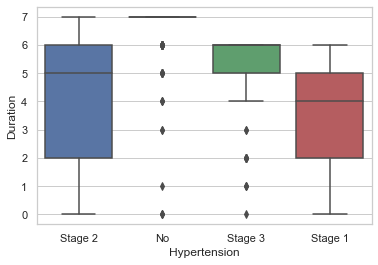

In [28]:
sns.boxplot(y="Duration", x="Hypertension", data=df)

<AxesSubplot:xlabel='temp', ylabel='Duration'>

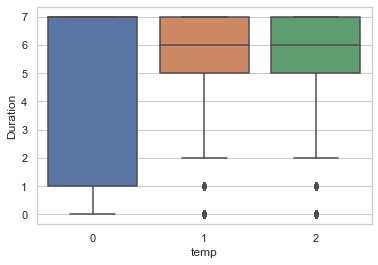

In [29]:
sns.boxplot(y="Duration", x="temp", data=df)

* Because there seems to be relationship between Duration and Hupertensiom, we will use Hypertension to generate values for null values

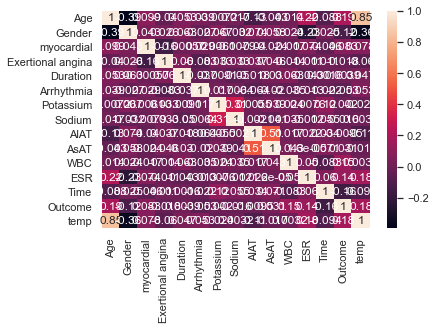

In [30]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Solving null value problem of Duration column with the help of Hypertension  Columns 


In [31]:

# null convert
df['Duration']=df.groupby(['Hypertension'])['Duration'].transform(lambda x: x.fillna(x.median()))


In [32]:
df['Systolic_intensive_care']=pd.to_numeric(df['Systolic_intensive_care'])

In [33]:
df['Diastolic_intensive_care']=pd.to_numeric(df['Diastolic_intensive_care'])

In [34]:
df[df['Systolic_intensive_care'].isna()].head(50)
#df[df['var2'].isnull()]

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,...,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome,temp
1,50.0,1,1.0,2.0,II FC,Unstable angina,Stage 2,No,0.0,0,...,NaN,3.9,132.0,0.23,0.52,6.2,20.0,7.0,0,1
5,54.0,1,0.0,6.0,No angina,No angina,No,No,7.0,0,...,NaN,5.3,139.0,0.15,0.11,6.8,30.0,2.0,0,1
11,49.0,1,1.0,3.0,II FC,Unstable angina,Stage 2,No,5.0,0,...,NaN,4.4,139.0,0.61,0.30,5.1,20.0,9.0,0,1
26,69.0,1,2.0,1.0,II FC,Unstable angina,Stage 2,No,0.0,0,...,NaN,4.5,141.0,0.61,0.41,7.5,48.0,9.0,0,2
56,65.0,1,2.0,0.0,II FC,Unstable angina,No,No,7.0,0,...,NaN,3.5,127.0,0.15,0.22,12.3,5.0,NaN,0,2
72,72.0,0,2.0,3.0,II FC,Exertional angina,Stage 2,No,2.0,0,...,NaN,3.6,130.0,1.20,0.15,4.8,NaN,3.0,0,2
76,74.0,0,0.0,5.0,II FC,Unstable angina,Stage 2,No,6.0,0,...,NaN,NaN,NaN,0.15,0.30,5.6,45.0,9.0,0,2
101,63.0,0,0.0,6.0,No angina,Unstable angina,Stage 2,No,2.0,0,...,NaN,4.6,140.0,0.30,0.15,8.8,4.0,3.0,0,2
102,62.0,1,0.0,6.0,No angina,No angina,Stage 2,No,5.0,0,...,NaN,3.1,132.0,0.23,0.15,13.1,4.0,7.0,0,2
109,71.0,0,2.0,2.0,II FC,Exertional angina,Stage 2,No,1.0,0,...,NaN,3.7,132.0,0.30,0.37,11.5,13.0,3.0,0,2


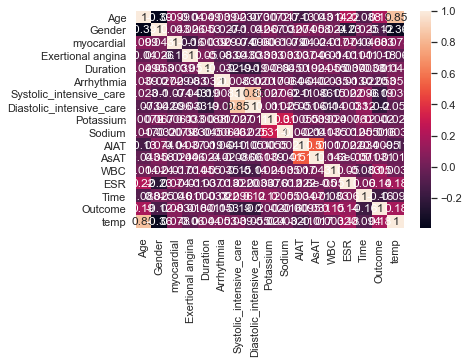

In [35]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='Hypertension', ylabel='Systolic_intensive_care'>

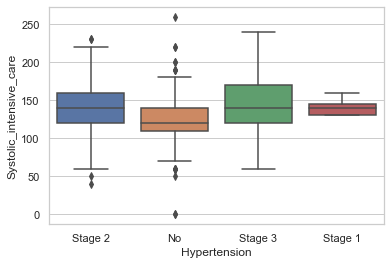

In [36]:
sns.boxplot(y="Systolic_intensive_care", x="Hypertension", data=df)

### Solving null value problem of Systolic_intensive_care column with the help of Hypertension  Columns 


In [37]:
# NULL soltution:Using Hypertension group to generate value for null for Systolic_intensive_care


df['Systolic_intensive_care']=df.groupby(['Hypertension'])['Systolic_intensive_care'].transform(lambda x: x.fillna(x.median()))


### Solving null value problem of Diastolic_intensive_care column with the help of Hypertension  Columns 


In [38]:
# Using same approach to find out Diastolic_intensive_care value from Systolic_intensive_care
df['Diastolic_intensive_care']=df.groupby(['Hypertension'])['Diastolic_intensive_care'].transform(lambda x: x.fillna(x.median()))




In [39]:
df['Potassium']=pd.to_numeric(df['Potassium'])
df['Sodium']=pd.to_numeric(df['Sodium'])
df['AlAT']=pd.to_numeric(df['AlAT'])
df['AsAT']=pd.to_numeric(df['AsAT'])
df['WBC']=pd.to_numeric(df['WBC'])
df['ESR']=pd.to_numeric(df['ESR'])
df['Time']=pd.to_numeric(df['Time'])

### Solving null value problem of Heart Disease column with the help of Hypertension  Columns 


In [40]:
df['Heart Disease'] = df.groupby(['Hypertension'])['Heart Disease'].transform(lambda x: x.fillna(x.value_counts().index[0]))


<AxesSubplot:xlabel='FC', ylabel='temp'>

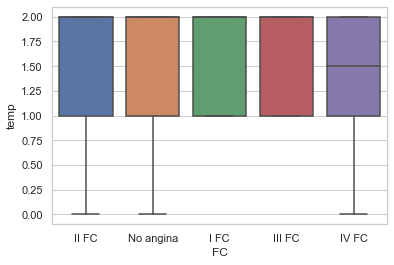

In [41]:
sns.boxplot(x="FC", y="temp", data=df)

### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [42]:

df['FC'] = df.groupby(['Heart Disease'])['FC'].transform(lambda x: x.fillna(x.value_counts().index[0]))


In [43]:
# null solution of potassium

<AxesSubplot:xlabel='FC', ylabel='Potassium'>

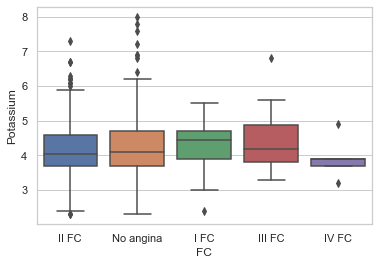

In [44]:
sns.boxplot(y="Potassium", x="FC", data=df)


<AxesSubplot:xlabel='temp', ylabel='Potassium'>

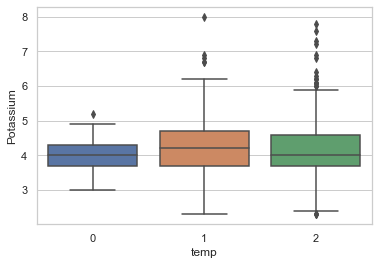

In [45]:
sns.boxplot(y="Potassium", x="temp", data=df)


### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [46]:
df['Potassium']=df.groupby(['FC'])['Potassium'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='Hypertension', ylabel='Sodium'>

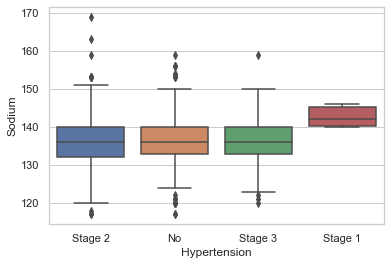

In [47]:
sns.boxplot(y="Sodium", x="Hypertension", data=df)



### Solving null value problem of Sodium  column with the help of Hypertension  Column


In [48]:

df['Sodium']=df.groupby(['Hypertension'])['Sodium'].transform(lambda x: x.fillna(x.median()))


In [49]:
# NULL solution for AlAT


<AxesSubplot:xlabel='Hypertension', ylabel='AlAT'>

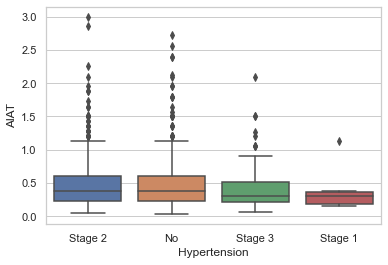

In [50]:
sns.boxplot(y="AlAT", x='Hypertension', data=df)



### Solving null value problem of AlAT  column with the help of Hypertension  Column


In [51]:
df['AlAT']=df.groupby(['Hypertension'])['AlAT'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='FC', ylabel='AsAT'>

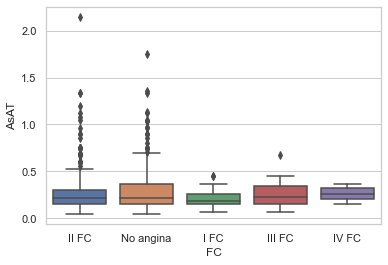

In [52]:
sns.boxplot(y="AsAT", x='FC', data=df)



### Solving null value problem of AsAT  column with the help of FC  Column


In [53]:
df['AsAT']=df.groupby(['FC'])['AsAT'].transform(lambda x: x.fillna(x.median()))


In [54]:
df.isna().sum()

Age                          0
Gender                       0
myocardial                   0
Exertional angina            0
FC                           0
Heart Disease                0
Hypertension                 0
Symptomatic hypertension     0
Duration                     0
Arrhythmia                   0
Systolic_intensive_care      0
Diastolic_intensive_care     0
Potassium                    0
Sodium                       0
AlAT                         0
AsAT                         0
WBC                         24
ESR                         73
Time                        68
Outcome                      0
temp                         0
dtype: int64

<AxesSubplot:xlabel='Exertional angina', ylabel='WBC'>

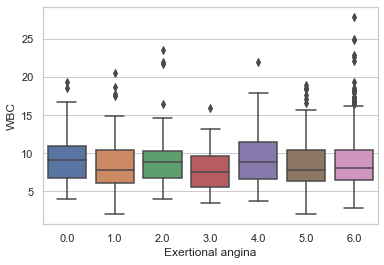

In [55]:
sns.boxplot(y="WBC", x='Exertional angina', data=df)


### Solving null value problem of WBC  column with the help of Exertional angina  Column


In [56]:
df['WBC']=df.groupby(['Exertional angina'])['WBC'].transform(lambda x: x.fillna(x.median()))


In [57]:
df.isna().sum()

Age                          0
Gender                       0
myocardial                   0
Exertional angina            0
FC                           0
Heart Disease                0
Hypertension                 0
Symptomatic hypertension     0
Duration                     0
Arrhythmia                   0
Systolic_intensive_care      0
Diastolic_intensive_care     0
Potassium                    0
Sodium                       0
AlAT                         0
AsAT                         0
WBC                          0
ESR                         73
Time                        68
Outcome                      0
temp                         0
dtype: int64

In [58]:
df.groupby(['Gender','myocardial'])['ESR'].mean()

Gender  myocardial
0       0.0           16.250996
        1.0           17.118280
        2.0           19.411765
        3.0           13.636364
1       0.0           10.764706
        1.0           11.654088
        2.0           15.122449
        3.0           13.864865
Name: ESR, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='ESR'>

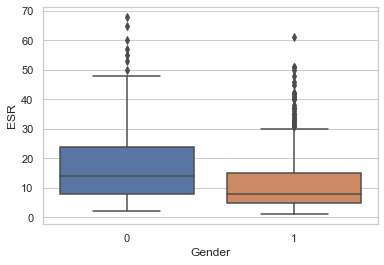

In [59]:
sns.boxplot(y="ESR", x='Gender', data=df)



<AxesSubplot:xlabel='myocardial', ylabel='ESR'>

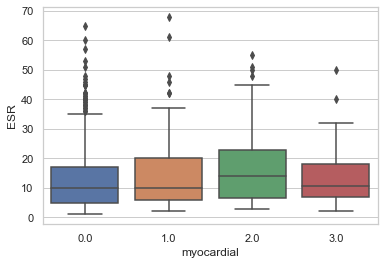

In [60]:
sns.boxplot(y="ESR", x='myocardial', data=df)


### Solving null value problem of ESR  column with the help of myocardial and Gender  Column


In [61]:
df['ESR']=df.groupby(['myocardial','Gender'])['ESR'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='FC', ylabel='Time'>

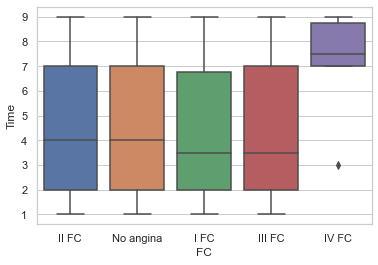

In [62]:
sns.boxplot(y="Time", x='FC', data=df)



<AxesSubplot:xlabel='Duration', ylabel='Time'>

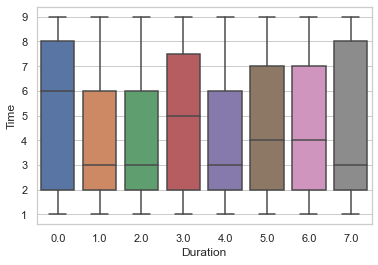

In [63]:
sns.boxplot(y="Time", x='Duration', data=df)


In [64]:
# FC hatauna parne huna sakcha

df.groupby(['Duration','FC'])['Time'].mean()

Duration  FC       
0.0       I FC         2.750000
          II FC        5.900000
          III FC       2.000000
          IV FC        7.000000
          No angina    5.343750
1.0       I FC         4.666667
          II FC        4.235294
          III FC       1.000000
          No angina    4.266667
2.0       I FC         2.000000
          II FC        4.750000
          III FC       4.500000
          No angina    3.315789
3.0       II FC        5.083333
          No angina    5.333333
4.0       I FC         1.000000
          II FC        4.590909
          No angina    3.321429
5.0       I FC         4.200000
          II FC        4.575758
          III FC       4.000000
          IV FC        8.000000
          No angina    5.234568
6.0       I FC         5.090909
          II FC        4.703297
          III FC       4.692308
          IV FC        7.000000
          No angina    4.604938
7.0       I FC         6.166667
          II FC        4.386207
          III FC    

### Solving null value problem of Time  column with the help of Duration and FC  Column


In [65]:
df['Time']=df.groupby(['Duration','FC'])['Time'].transform(lambda x: x.fillna(x.median()))
aa=df
c=aa

In [66]:
c=c.drop('temp',axis=1)

# Converting categorical data into one hot vector

In [67]:
columns= ['FC','Heart Disease','Hypertension','Symptomatic hypertension']    

In [68]:
import pandas as pd

for col in columns:
    one_hot=pd.get_dummies(c[col])
    one_hot = one_hot.add_prefix(col)
    c=c.drop(col,axis=1)
    c=c.join(one_hot)

c.head()

,Age,Gender,myocardial,Exertional angina,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,...,FCNo angina,Heart DiseaseExertional angina,Heart DiseaseNo angina,Heart DiseaseUnstable angina,HypertensionNo,HypertensionStage 1,HypertensionStage 2,HypertensionStage 3,Symptomatic hypertensionNo,Symptomatic hypertensionYes
0,75.0,0,0.0,2.0,5.0,0,140.0,90.0,4.05,136.0,...,0,1,0,0,0,0,1,0,1,0
1,50.0,1,1.0,2.0,0.0,0,140.0,90.0,3.90,132.0,...,0,0,0,1,0,0,1,0,1,0
4,76.0,0,3.0,6.0,6.0,0,110.0,70.0,4.10,136.0,...,1,0,0,1,0,0,1,0,1,0
5,54.0,1,0.0,6.0,7.0,0,120.0,80.0,5.30,139.0,...,1,0,1,0,1,0,0,0,1,0
7,63.0,1,0.0,6.0,7.0,0,110.0,70.0,4.40,141.0,...,1,0,1,0,1,0,0,0,1,0


# Model building

In [69]:
#y_train=c['Outcome']
#x_train = c.drop('Outcome', axis=1)
y=c['Outcome']
x = c.drop('Outcome', axis=1)


In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(
   x, y, random_state = 0)

### KNN Classification

In [71]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#best implementation
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [5, 10, 15, 20, 30, 40, 50]}
knn_grid = GridSearchCV(knn, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
knn_grid.fit(x_train, y_train) #imbalance X_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
             scoring='roc_auc')

In [72]:
knn_grid.best_params_

{'n_neighbors': 40}

In [73]:
knn_grid.best_score_

0.7268069892349185

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(y_train, knn_grid.predict(x_train)),roc_auc_score(y_test, knn_grid.predict(x_test))

(0.5275590551181102, 0.5365853658536586)

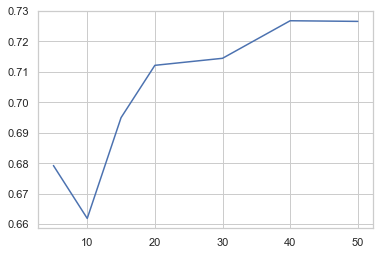

In [75]:
a=knn_grid.cv_results_
y=a['mean_test_score']
x=[5, 10, 15, 20, 30, 40, 50]
plt.plot(x,y)

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [50,100,500,1000]}

logreg = LogisticRegression(random_state=0)
logreg_grid = GridSearchCV(logreg, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
logreg_grid.fit(x_train, y_train)

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 500, 1000]},
             scoring='roc_auc')

In [77]:
logreg_grid.best_params_


{'C': 1, 'max_iter': 500}

In [78]:
logreg_score = logreg_grid.best_score_
print(logreg_score)

0.7714579039979099


In [79]:
roc_auc_score(y_train, logreg_grid.predict(x_train)),roc_auc_score(y_test, logreg_grid.predict(x_test))

(0.5767411125795453, 0.6072453371592539)

In [80]:
#break

### Linear SVM


In [81]:
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

linsvc = LinearSVC(random_state=0)

param_grid = {'C': [.001,.01,.1,1,10,100]}

linsvc_grid = GridSearchCV(linsvc, cv = 5, param_grid=param_grid, n_jobs = -1, scoring = 'roc_auc')
linsvc_grid.fit(x_train, y_train)

linsvc_score = linsvc_grid.best_score_
print(linsvc_score)

0.7544200610098123


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [82]:
linsvc_grid.best_params_


{'C': 0.01}

In [83]:
roc_auc_score(y_train, linsvc_grid.predict(x_train)),roc_auc_score(y_test, linsvc_grid.predict(x_test))

(0.5236220472440944, 0.49789915966386555)

### Kernelized SVM - rbf

In [85]:
from sklearn.svm import SVC

param_grid = {'C': [.001,.01,.1,1,10,100], 'gamma': [.001,.01,.1,1,10,100]}

svcr = SVC(kernel='rbf', random_state=0)

svcr_grid = GridSearchCV(svcr, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcr_grid.fit(x_train, y_train)

rsvc_score = svcr_grid.best_score_
print(rsvc_score)

0.7126429696564548


In [86]:
svcr_grid.best_params_

{'C': 10, 'gamma': 0.001}

In [87]:
roc_auc_score(y_train, svcr_grid.predict(x_train)),roc_auc_score(y_test, svcr_grid.predict(x_test))

(0.711893206579079, 0.5580549292887886)

### Kernelized SVM - poly

In [88]:
from sklearn.svm import SVC

param_grid = {'C': [.1,1,10,20,100]}

svcp = SVC(kernel='poly', degree=3, random_state=0, coef0=1)

svcp_grid = GridSearchCV(svcp, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcp_grid.fit(x_train, y_train)

psvc_score = svcp_grid.best_score_
print(psvc_score)

0.7749308683525046


In [89]:
svcp_grid.best_params_


{'C': 20}

In [90]:
roc_auc_score(y_train, svcp_grid.predict(x_train)),roc_auc_score(y_test, svcp_grid.predict(x_test))

(0.5275590551181102, 0.5100942816150851)

### Kernelized SVM - linear

In [91]:
from sklearn.svm import SVC

param_grid = {'C': [.1,1,10,100]}

lsvc = SVC(kernel='linear', random_state=0)

lsvc_grid = GridSearchCV(lsvc, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

lsvc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='roc_auc')

In [92]:
lsvc_score = lsvc_grid.best_score_
print(lsvc_score)

0.7458153723212158


In [93]:
lsvc_grid.best_params_

{'C': 0.1}

In [94]:
roc_auc_score(y_train, lsvc_grid.predict(x_train)),roc_auc_score(y_test, lsvc_grid.predict(x_test))

(0.5, 0.5)

### Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

midlst= [.001,.005,.01,.05,.1] # these numbers are relatively arbitrary
msllst= [30,60,120,240,480] # below a sample of size n=30 is not significant enough to justify its own leaf
msslst= [30,60,120,240,480] 
mdlst= [20,30,40,50,60,70] # too large of a tree will lose its interpretability, and therefore its business value. May consider further trimming.

param_grid = {'min_impurity_decrease': midlst, 'min_samples_leaf': msllst, 'min_samples_split': msslst, 'max_depth': mdlst}

tree = DecisionTreeClassifier(random_state=0)
tree_grid = GridSearchCV(tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40, 50, 60, 70],
                         'min_impurity_decrease': [0.001, 0.005, 0.01, 0.05,
                                                   0.1],
                         'min_samples_leaf': [30, 60, 120, 240, 480],
                         'min_samples_split': [30, 60, 120, 240, 480]},
             scoring='roc_auc')

In [96]:
dtree_score = tree_grid.best_score_
print(dtree_score)

0.7071869943062632


In [97]:
tree = DecisionTreeClassifier(**tree_grid.best_params_,random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.001,
                       min_samples_leaf=60, min_samples_split=240,
                       random_state=0)

In [98]:
tree.score(x_train,y_train)

0.8480861244019139

In [99]:
roc_auc_score(y_train, tree_grid.predict(x_train)),roc_auc_score(y_test, tree_grid.predict(x_test))

(0.5, 0.5)

# Voting Classifier

In [100]:
from sklearn.ensemble import VotingClassifier

knn_clf = KNeighborsClassifier(**knn_grid.best_params_)
knn_clf.fit(x_train,y_train)

log_clf = LogisticRegression(**logreg_grid.best_params_,random_state=0)
log_clf.fit(x_train,y_train)

linsvc = LinearSVC(**linsvc_grid.best_params_,random_state=0)
linsvc.fit(x_train,y_train)

svcr = SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)

svcp = SVC(**svcp_grid.best_params_,kernel='poly')
svcp.fit(x_train,y_train)

lsvc = SVC(**lsvc_grid.best_params_,kernel='linear', random_state=0)
lsvc.fit(x_train,y_train)

tree = DecisionTreeClassifier(**tree_grid.best_params_,random_state=0)
tree.fit(x_train,y_train)

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.001,
                       min_samples_leaf=60, min_samples_split=240,
                       random_state=0)

In [101]:

from sklearn.metrics import roc_auc_score


voting_clf = VotingClassifier(estimators=[('linsvc',linsvc),('log_clf', log_clf), ('knn_clf', knn_clf),('lsvc',lsvc),('svcr', svcr),('svcp',svcp),
                                          ('tree',tree)], voting='hard')
voting_clf.fit(x_train, y_train)

score1=[]
from sklearn.metrics import accuracy_score
for clf in (linsvc,log_clf, knn_clf, lsvc,svcr, svcp,tree,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    score1.append(roc_auc_score(y_test, y_pred))


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC 0.49789915966386555


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.6072453371592539
KNeighborsClassifier 0.5365853658536586
SVC 0.5
SVC 0.5580549292887886
SVC 0.49789915966386555
DecisionTreeClassifier 0.5


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.5


# Bagging on LogisticRegression

In [102]:
from sklearn.ensemble import BaggingClassifier

log_clf = LogisticRegression(**logreg_grid.best_params_,random_state=0)
log_clf.fit(x_train,y_train)

bag_clf = BaggingClassifier(log_clf, random_state=0,n_jobs=-1)

param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)

grid_search.best_score_


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7463267021660789

In [103]:
roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

(0.5451284386348745, 0.5323836851813897)

## Bagging classifier on SVC kenel='rbf




In [104]:
from sklearn.ensemble import BaggingClassifier

svcr = SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)

bag_clf = BaggingClassifier(svcr, random_state=0,n_jobs=-1)

param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)

grid_search.best_score_


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

0.727476222309306

In [105]:
roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

(0.5426018679964018, 0.5445788071326093)

In [106]:
9

9

In [107]:
8

8

## Pasting  on LogisticRegression

In [108]:
from sklearn.ensemble import BaggingClassifier

log_clf = LogisticRegression(**logreg_grid.best_params_,random_state=0)
log_clf.fit(x_train,y_train)


bag_clf = BaggingClassifier(log_clf, random_state=0,bootstrap=False, n_jobs=-1)


param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)
grid_search.best_score_


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7475903582981798

In [109]:

roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

(0.537254422886843, 0.4957983193277311)

# Pasting on SVC kernel='rbf'

In [110]:
from sklearn.ensemble import BaggingClassifier

svcr = SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)


bag_clf = BaggingClassifier(svcr, random_state=0,bootstrap=False, n_jobs=-1)


param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)
grid_search.best_score_


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 262, in __call__
    return [func(*args, **kwargs)
  File "/

0.7176502155321454

In [111]:
roc_auc_score(y_train, grid_search.predict(x_train)),roc_auc_score(y_test, grid_search.predict(x_test))

(0.5497706651266617, 0.5424779667964748)

In [112]:
8

8

## Adaboast on Logistic Regression

In [113]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LogisticRegression(**logreg_grid.best_params_,random_state=0), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train, y_train)

AdaboastlinearSVC=roc_auc_score(y_train, ada_clf.predict(x_train))
roc_auc_score(y_train, ada_clf.predict(x_train)),roc_auc_score(y_test, ada_clf.predict(x_test))

(0.6102917494974622, 0.6148288583726174)

## Adaboast on SVC-kernel-'rbf'

In [114]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(SVC(**svcr_grid.best_params_,kernel='rbf', random_state=0), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train, y_train)

AdaboastlinearSVC=roc_auc_score(y_train, ada_clf.predict(x_train))
roc_auc_score(y_train, ada_clf.predict(x_train)),roc_auc_score(y_test, ada_clf.predict(x_test))

(0.5, 0.5)

# Gradient Bosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

Gradient_Bosting=roc_auc_score(y_train, gbrt.predict(x_train))
roc_auc_score(y_train, gbrt.predict(x_train)),roc_auc_score(y_test, gbrt.predict(x_test))

(0.8221294270515198, 0.6232322197171551)

# Checking if deep learning performs better than  Gradient Boosting

In [116]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
seed = 10
np.random.seed(10)

In [117]:
x_train.shape

(836, 29)

In [118]:
# create model
model = Sequential()
model.add(Dense(2, input_dim=29, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [119]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
84/84 [==============================] - 1s 1ms/step - loss: 1.1202 - accuracy: 0.5148
Epoch 2/150
84/84 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.8664
Epoch 3/150
84/84 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.8564
Epoch 4/150
84/84 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.8724
Epoch 5/150
84/84 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.8822
Epoch 6/150
84/84 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.8506
Epoch 7/150
84/84 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8719
Epoch 8/150
84/84 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8615
Epoch 9/150
84/84 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8724
Epoch 10/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8704
Epoch 11/

84/84 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8626
Epoch 84/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8464
Epoch 85/150
84/84 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8343
Epoch 86/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8537
Epoch 87/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8825
Epoch 88/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8607
Epoch 89/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8671
Epoch 90/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8635
Epoch 91/150
84/84 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8325
Epoch 92/150
84/84 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8581
Epoch 93/150


In [121]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8674

accuracy: 86.74%


In [122]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(2, input_dim=29, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [123]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search_deeplearning = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [124]:
grid_search_result = grid_search_deeplearning.fit(x_train, y_train)

In [125]:
grid_search_deeplearning.score(x_train, y_train)

0.8540669679641724

In [126]:
grid_search_deeplearning.score(x_test, y_test)

0.8530465960502625

In [127]:
roc_auc_score(y_train, grid_search_deeplearning.predict(x_train)),roc_auc_score(y_test, grid_search_deeplearning.predict(x_test))

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your mod

(0.5713936674699865, 0.5504714080754253)

* Deep learning seems to be doing equally fine but not great

# Best Model: Gradient Boosting

## Out of all the models we implemented Gradient Boosting is the best model in this case. The reasons are
* It has high train and test ROC_AUC score
* Although this model can be considered overfitting than other model,it gave better prediction on unseen data
> I assumes that the unseen data have similar percentage of Yes and No component in the Output columns(Y variable) and only gradient descent is predicting 'Yes' and 'No' for the unseen data in the similar proportion

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

Gradient_Bosting=roc_auc_score(y_train, gbrt.predict(x_train))
roc_auc_score(y_train, gbrt.predict(x_train)),roc_auc_score(y_test, gbrt.predict(x_test))

(0.8221294270515198, 0.6232322197171551)

* It not only have relatively high ROC_AUC score but the Train and test scores are also consistent with one another

### Now it's check if scaling the data gives us the better result or not


In [129]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA(n_components=0.95)
scaler=MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

* Seems like it doesn't matter much

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train_scale, y_train)

Gradient_Bosting=roc_auc_score(y_train, gbrt.predict(x_train_scale))
roc_auc_score(y_train, gbrt.predict(x_train_scale)),roc_auc_score(y_test, gbrt.predict(x_test_scale))

(0.8221294270515198, 0.6232322197171551)

### Now we will use whole training data to build the model in gradient boosting

In [131]:
y=c['Outcome']
x = c.drop('Outcome', axis=1)

from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x, y)

roc_auc_score(y, gbrt.predict(x))

0.7886904761904762

In [207]:
8

8

# Evaluation Data(TEST DATA)

* X_Test data is preprocessed and used to predict y_pred


In [134]:
# Evaluation Data


df=pd.read_csv('/Users/sandeepgautam/Desktop/test (2).csv')
df=df.replace('?',np.nan)
df.head()
df['Output']=1000
df.head()

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Heredity,Hypertension,Symptomatic hypertension,Duration,...,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output
0,63,Male,0,Two years ago,II FC,Exertional angina,NaN,No,No,No hypertension,...,130,80,4.5,134,0.61,0.33,6.5,15,5,1000
1,70,Male,1,During the last year,II FC,Exertional angina,NaN,Stage 2,No,More than 10 years,...,120,80,NaN,NaN,0.3,0.11,11.1,5,1,1000
2,50,Male,0,Never,No angina,No angina,NaN,Stage 2,No,NaN,...,NaN,NaN,4.8,140,0.75,0.41,7.7,5,3,1000
3,63,Male,1,NaN,II FC,Exertional angina,NaN,No,No,No hypertension,...,70,40,5,146,0.45,0.22,9.8,25,NaN,1000
4,74,Female,1,Three years ago,II FC,Exertional angina,NaN,Stage 2,No,Three years,...,120,80,NaN,NaN,1.05,0.22,6.1,NaN,8,1000


In [135]:
df.isnull().sum()

Age                           3
Gender                        0
myocardial                    3
Exertional angina            33
FC                           23
Heart Disease                11
Heredity                    410
Hypertension                  5
Symptomatic hypertension      5
Duration                     58
Arrhythmia                    7
Systolic_emergency          275
Diastolic_emergency         275
Systolic_intensive_care      58
Diastolic_intensive_care     58
Potassium                    89
Sodium                       92
AlAT                         76
AsAT                         76
WBC                          38
ESR                          60
Time                         29
Output                        0
dtype: int64

## EACH COLUMN ARE CLEANED USING THE COLUMS THEY SEEM TO BE RELATED

In [136]:
df['Age']=pd.to_numeric(df['Age'])
df['myocardial']=pd.to_numeric(df['myocardial'])
df['Potassium']=pd.to_numeric(df['Potassium'])
df['Sodium']=pd.to_numeric(df['Sodium'])
df['AlAT']=pd.to_numeric(df['AlAT'])
df['AsAT']=pd.to_numeric(df['AsAT'])
df['WBC']=pd.to_numeric(df['WBC'])
df['ESR']=pd.to_numeric(df['ESR'])
df['Time']=pd.to_numeric(df['Time'])


### Solving null value problem of Age column with the help of Gender   Columns 


In [137]:
df.Age.replace(999,np.nan,inplace=True)
df['Age']=df.groupby("Gender")['Age'].transform(lambda x: x.fillna(x.median()))

In [138]:
df.shape

(425, 23)

In [139]:
df.isna().sum()

Age                           0
Gender                        0
myocardial                    3
Exertional angina            33
FC                           23
Heart Disease                11
Heredity                    410
Hypertension                  5
Symptomatic hypertension      5
Duration                     58
Arrhythmia                    7
Systolic_emergency          275
Diastolic_emergency         275
Systolic_intensive_care      58
Diastolic_intensive_care     58
Potassium                    89
Sodium                       92
AlAT                         76
AsAT                         76
WBC                          38
ESR                          60
Time                         29
Output                        0
dtype: int64

In [140]:
df=df.drop('Heredity',axis=1)
df=df.drop('Systolic_emergency',axis=1)
df=df.drop('Diastolic_emergency',axis=1)

In [141]:
df.isnull().sum().sum()

721

In [142]:
df.isnull().sum()

Age                          0
Gender                       0
myocardial                   3
Exertional angina           33
FC                          23
Heart Disease               11
Hypertension                 5
Symptomatic hypertension     5
Duration                    58
Arrhythmia                   7
Systolic_intensive_care     58
Diastolic_intensive_care    58
Potassium                   89
Sodium                      92
AlAT                        76
AsAT                        76
WBC                         38
ESR                         60
Time                        29
Output                       0
dtype: int64

In [143]:
df['myocardial']=pd.to_numeric(df['myocardial'])


In [144]:
df['Age']=pd.to_numeric(df['Age'])


In [145]:
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
df.head()

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output
0,63.0,1,0.0,Two years ago,II FC,Exertional angina,No,No,No hypertension,No,130,80,4.5,134.0,0.61,0.33,6.5,15.0,5.0,1000
1,70.0,1,1.0,During the last year,II FC,Exertional angina,Stage 2,No,More than 10 years,No,120,80,NaN,NaN,0.30,0.11,11.1,5.0,1.0,1000
2,50.0,1,0.0,Never,No angina,No angina,Stage 2,No,NaN,No,NaN,NaN,4.8,140.0,0.75,0.41,7.7,5.0,3.0,1000
3,63.0,1,1.0,NaN,II FC,Exertional angina,No,No,No hypertension,No,70,40,5.0,146.0,0.45,0.22,9.8,25.0,NaN,1000
4,74.0,0,1.0,Three years ago,II FC,Exertional angina,Stage 2,No,Three years,No,120,80,NaN,NaN,1.05,0.22,6.1,NaN,8.0,1000


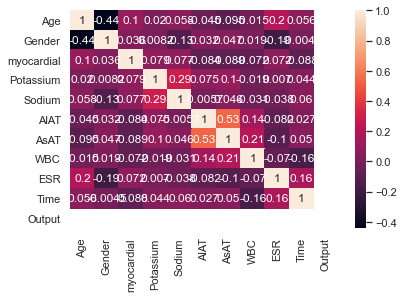

In [146]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [147]:
# When Arrhythmia is yes, make it 1 or else o
df['Arrhythmia']=np.where(df['Arrhythmia']=='Yes',1,0)

In [148]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='Arrhythmia', ylabel='Age'>

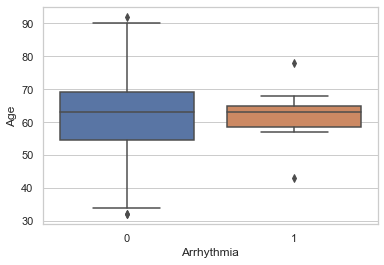

In [149]:
sns.boxplot(x="Arrhythmia", y="Age", data=df)

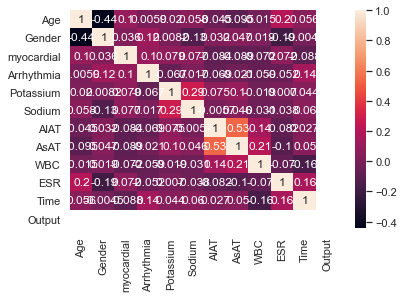

In [150]:
import seaborn as sn
correlation=df.select_dtypes(include='number')
corrMatrix=correlation.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Solving null value problem of ESR  column with the help of myocardial and Gender  Column


<AxesSubplot:xlabel='Arrhythmia', ylabel='myocardial'>

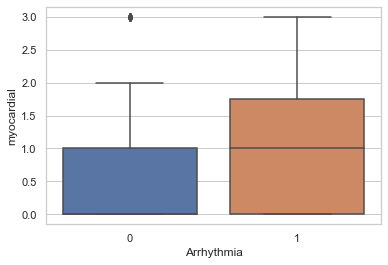

In [151]:
sns.boxplot(y="myocardial", x="Arrhythmia", data=df)

In [152]:
df[df.myocardial.isna()]

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output
140,66.0,0,NaN,NaN,NaN,NaN,No,Yes,NaN,0,60,20,NaN,NaN,0.30,0.15,12.0,3.0,2.0,1000
255,75.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,90,60,6.0,143.0,0.30,0.18,7.4,5.0,3.0,1000
344,40.0,1,NaN,NaN,NaN,NaN,No,No,No hypertension,0,80,60,2.9,133.0,0.45,0.98,7.4,16.0,NaN,1000


### Creating New column temp which is temp age range columns just to see if there is some relationship between age and different group

In [153]:
a=[]
for i in df['Age']:
    if i<=40:
        a.append('Young')
    elif i>=60:
        a.append('Old')
    else:
        a.append('Mid_age')
df['temp']=a
df.head()

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,...,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output,temp
0,63.0,1,0.0,Two years ago,II FC,Exertional angina,No,No,No hypertension,0,...,80,4.5,134.0,0.61,0.33,6.5,15.0,5.0,1000,Old
1,70.0,1,1.0,During the last year,II FC,Exertional angina,Stage 2,No,More than 10 years,0,...,80,NaN,NaN,0.30,0.11,11.1,5.0,1.0,1000,Old
2,50.0,1,0.0,Never,No angina,No angina,Stage 2,No,NaN,0,...,NaN,4.8,140.0,0.75,0.41,7.7,5.0,3.0,1000,Mid_age
3,63.0,1,1.0,NaN,II FC,Exertional angina,No,No,No hypertension,0,...,40,5.0,146.0,0.45,0.22,9.8,25.0,NaN,1000,Old
4,74.0,0,1.0,Three years ago,II FC,Exertional angina,Stage 2,No,Three years,0,...,80,NaN,NaN,1.05,0.22,6.1,NaN,8.0,1000,Old


* We will use temp columns if it helps us to solve null value problems

<AxesSubplot:xlabel='Arrhythmia', ylabel='myocardial'>

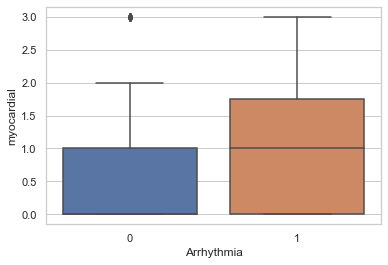

In [154]:
sns.boxplot(y="myocardial", x="Arrhythmia", data=df)

In [155]:
df.groupby('temp').median()

,Age,Gender,myocardial,Arrhythmia,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output
temp,,,,,,,,,,,,
Mid_age,53.0,1,0.0,0,4.1,136.0,0.45,0.22,7.65,7.0,3.0,1000
Old,67.0,0,0.0,0,4.2,136.0,0.38,0.18,7.90,11.0,5.0,1000
Young,37.0,1,0.0,0,3.8,136.0,0.45,0.30,8.65,7.0,4.0,1000


### Solving null value problem of Arrhythmia column with the help of Gender and myocardial Columns 


In [156]:
### Solving null value problem of Arrhythmia column with the help of Gender and myocardial Columns 
df.groupby('Arrhythmia').median()

,Age,Gender,myocardial,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output
Arrhythmia,,,,,,,,,,,
0,63.0,1,0.0,4.1,136.0,0.43,0.22,7.8,10.0,4.0,1000
1,63.0,1,1.0,3.8,137.5,0.23,0.18,5.5,6.0,8.0,1000


### Solving null value problem of myocardial column with the help of Arrhythmia Columns


In [157]:
df['myocardial']=df.groupby("Arrhythmia")['myocardial'].transform(lambda x: x.fillna(x.median()))

> Changing Exertional angina columns into ordinal data where Never=6 and One year ago=1(Other values are in between)

In [158]:
df['Exertional angina'].replace('During the last year',0,inplace=True)
df['Exertional angina'].replace('One year ago',1,inplace=True)
df['Exertional angina'].replace('Two years ago',2,inplace=True)
df['Exertional angina'].replace('Three years ago',3,inplace=True)
df['Exertional angina'].replace('Four to five years ago',4,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('More than five years ago',5,inplace=True)
df['Exertional angina'].replace('Never',6,inplace=True)

In [159]:
df.groupby(['myocardial']).mean()

,Age,Gender,Exertional angina,Arrhythmia,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output
myocardial,,,,,,,,,,,,
0.0,60.592391,0.597826,4.564706,0.014493,4.159556,136.229730,0.534779,0.284823,8.658000,12.623431,4.748062,1000.0
1.0,62.857143,0.659341,3.048193,0.032967,4.171642,136.074627,0.466234,0.233896,8.983133,14.469136,4.658824,1000.0
2.0,65.894737,0.526316,3.694444,0.026316,4.256667,136.766667,0.433125,0.227812,7.466667,15.366667,4.257143,1000.0
3.0,61.000000,0.750000,3.944444,0.100000,4.450000,139.428571,0.484286,0.274286,7.950000,14.866667,3.555556,1000.0



### Solving null value problem of Exertional angina column with the help of myocardial and Exertional angina   Columns 


In [160]:
df['Exertional angina']=df.groupby(['myocardial'])['Exertional angina'].transform(lambda x: x.fillna(x.median()))


In [161]:
df.isna().sum()

Age                          0
Gender                       0
myocardial                   0
Exertional angina            0
FC                          23
Heart Disease               11
Hypertension                 5
Symptomatic hypertension     5
Duration                    58
Arrhythmia                   0
Systolic_intensive_care     58
Diastolic_intensive_care    58
Potassium                   89
Sodium                      92
AlAT                        76
AsAT                        76
WBC                         38
ESR                         60
Time                        29
Output                       0
temp                         0
dtype: int64

In [162]:
df[df['Hypertension'].isna()]

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,...,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output,temp
15,57.0,1,0.0,6.0,NaN,NaN,NaN,NaN,NaN,0,...,70,4.6,140.0,0.30,0.15,16.7,5.0,3.0,1000,Mid_age
79,88.0,0,2.0,5.0,II FC,Unstable angina,NaN,NaN,NaN,0,...,80,4.2,146.0,0.45,0.49,8.0,NaN,5.0,1000,Old
255,75.0,1,0.0,6.0,NaN,NaN,NaN,NaN,NaN,0,...,60,6.0,143.0,0.30,0.18,7.4,5.0,3.0,1000,Old
389,68.0,0,0.0,6.0,No angina,No angina,NaN,NaN,NaN,0,...,80,4.5,130.0,0.15,0.15,20.2,22.0,2.0,1000,Old
408,61.0,0,1.0,4.0,II FC,Unstable angina,NaN,NaN,NaN,0,...,50,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1000,Old


In [163]:
df['Hypertension'].value_counts()

Stage 2    210
No         160
Stage 3     47
Stage 1      3
Name: Hypertension, dtype: int64

> Creating new variable just to solve null value problem

In [164]:
a=[]
for i in df['Hypertension']:
    if i=='Stage 2':
        a.append(2)
    elif i=='Stage 3':
        a.append(3)
    elif i=='Stage 1':
        a.append(1)
    else:
        a.append(0)
df['HYPER']=a
df.head()

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Hypertension,Symptomatic hypertension,Duration,Arrhythmia,...,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Output,temp,HYPER
0,63.0,1,0.0,2.0,II FC,Exertional angina,No,No,No hypertension,0,...,4.5,134.0,0.61,0.33,6.5,15.0,5.0,1000,Old,0
1,70.0,1,1.0,0.0,II FC,Exertional angina,Stage 2,No,More than 10 years,0,...,NaN,NaN,0.30,0.11,11.1,5.0,1.0,1000,Old,2
2,50.0,1,0.0,6.0,No angina,No angina,Stage 2,No,NaN,0,...,4.8,140.0,0.75,0.41,7.7,5.0,3.0,1000,Mid_age,2
3,63.0,1,1.0,4.0,II FC,Exertional angina,No,No,No hypertension,0,...,5.0,146.0,0.45,0.22,9.8,25.0,NaN,1000,Old,0
4,74.0,0,1.0,3.0,II FC,Exertional angina,Stage 2,No,Three years,0,...,NaN,NaN,1.05,0.22,6.1,NaN,8.0,1000,Old,2


<AxesSubplot:xlabel='temp', ylabel='HYPER'>

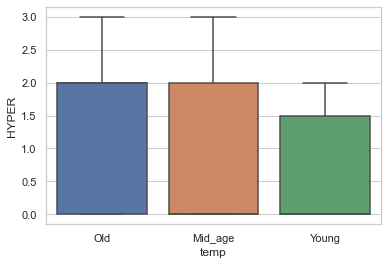

In [165]:
sns.boxplot(y="HYPER", x="temp", data=df)

In [166]:
df['HYPER']=df.groupby(['temp'])['HYPER'].transform(lambda x: x.fillna(x.median()))


In [167]:
df['Hypertension'].value_counts()

Stage 2    210
No         160
Stage 3     47
Stage 1      3
Name: Hypertension, dtype: int64

In [168]:
a=[]
for i in df['HYPER']:
    if i==2:
        a.append('Stage 2')
    elif i==3:
        a.append('Stage 3')
    elif i==1:
        a.append('Stage 1')
    else:
        a.append('No')
df['HYPER']=a


In [169]:
df['Hypertension']=df['HYPER']

In [170]:
df['Hypertension'].isna().sum()

0

  ### SOlving null value problem of Symptomatic hypertension by simply replacing the most reppeted value

In [172]:
df['Symptomatic hypertension'].fillna('No',inplace=True)

In [173]:
df.isna().sum()

Age                          0
Gender                       0
myocardial                   0
Exertional angina            0
FC                          23
Heart Disease               11
Hypertension                 0
Symptomatic hypertension     0
Duration                    58
Arrhythmia                   0
Systolic_intensive_care     58
Diastolic_intensive_care    58
Potassium                   89
Sodium                      92
AlAT                        76
AsAT                        76
WBC                         38
ESR                         60
Time                        29
Output                       0
temp                         0
HYPER                        0
dtype: int64

In [174]:
df['Duration'].replace('One year',0,inplace=True)
df['Duration'].replace('Two years',1,inplace=True)
df['Duration'].replace('Three years',2,inplace=True)
df['Duration'].replace('Four years',3,inplace=True)
df['Duration'].replace('Five years',4,inplace=True)
df['Duration'].replace('Six to ten years',5,inplace=True)
df['Duration'].replace('More than 10 years',6,inplace=True)
df['Duration'].replace('No hypertension',7,inplace=True)

df.Duration.value_counts()

7.0    155
6.0    109
5.0     35
0.0     20
4.0     18
1.0     13
2.0     13
3.0      4
Name: Duration, dtype: int64

<AxesSubplot:xlabel='Hypertension', ylabel='Duration'>

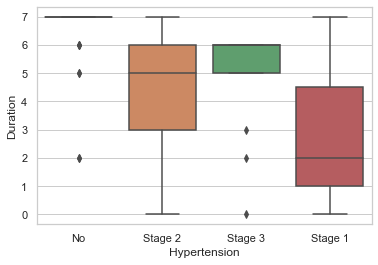

In [175]:
sns.boxplot(y="Duration", x="Hypertension", data=df)

### Solving null value problem of Duration column with the help of Hypertension  Columns 


In [176]:
df['Duration']=df.groupby(['Hypertension'])['Duration'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='Hypertension', ylabel='Systolic_intensive_care'>

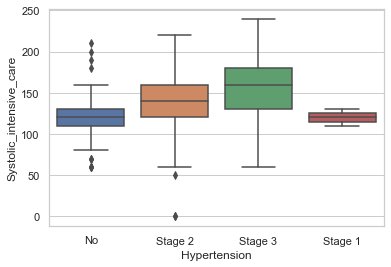

In [177]:
df['Systolic_intensive_care']=pd.to_numeric(df['Systolic_intensive_care'])
sns.boxplot(y="Systolic_intensive_care", x="Hypertension", data=df)

### Solving null value problem of Systolic_intensive_care column with the help of Hypertension  Columns 


In [178]:
df['Systolic_intensive_care']=df.groupby(['Hypertension'])['Systolic_intensive_care'].transform(lambda x: x.fillna(x.median()))


### Solving null value problem of Diastolic_intensive_care column with the help of Hypertension  Columns 


In [179]:
df['Diastolic_intensive_care']=df.groupby(['Hypertension'])['Diastolic_intensive_care'].transform(lambda x: x.fillna(x.median()))


In [180]:
df.isna().sum()

Age                          0
Gender                       0
myocardial                   0
Exertional angina            0
FC                          23
Heart Disease               11
Hypertension                 0
Symptomatic hypertension     0
Duration                     0
Arrhythmia                   0
Systolic_intensive_care      0
Diastolic_intensive_care     0
Potassium                   89
Sodium                      92
AlAT                        76
AsAT                        76
WBC                         38
ESR                         60
Time                        29
Output                       0
temp                         0
HYPER                        0
dtype: int64

### Solving null value problem of Heart Disease column with the help of Hypertension  Columns 


In [181]:
df['Heart Disease'] = df.groupby(['Hypertension'])['Heart Disease'].transform(lambda x: x.fillna(x.value_counts().index[0]))


### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [182]:
df['FC'] = df.groupby(['Heart Disease'])['FC'].transform(lambda x: x.fillna(x.value_counts().index[0]))


<AxesSubplot:xlabel='FC', ylabel='Potassium'>

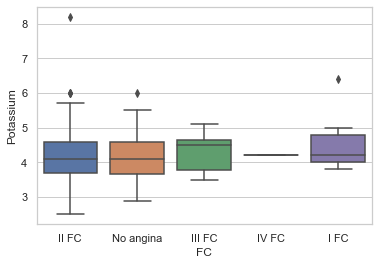

In [183]:
sns.boxplot(y="Potassium", x="FC", data=df)


### Solving null value problem of FC column with the help of Heart Disease  Columns 


In [184]:
df['Potassium']=df.groupby(['FC'])['Potassium'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='Hypertension', ylabel='Sodium'>

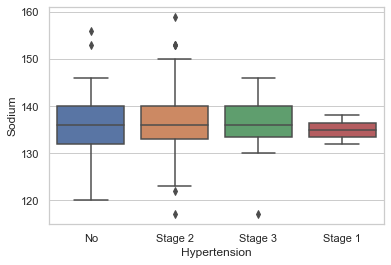

In [185]:
sns.boxplot(y="Sodium", x="Hypertension", data=df)


### Solving null value problem of Sodium  column with the help of Hypertension  Column


In [186]:
df['Sodium']=df.groupby(['Hypertension'])['Sodium'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='Hypertension', ylabel='AlAT'>

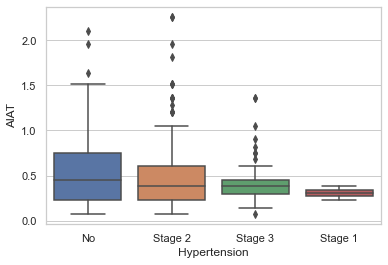

In [187]:
sns.boxplot(y="AlAT", x='Hypertension', data=df)


In [188]:
### Solving null value problem of AlAT  column with the help of Hypertension  Column


In [189]:
df['AlAT']=df.groupby(['Hypertension'])['AlAT'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='FC', ylabel='AsAT'>

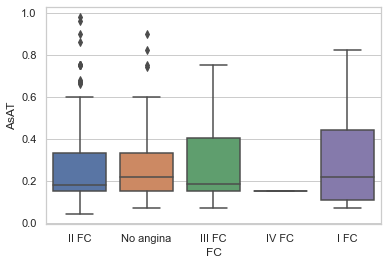

In [190]:
sns.boxplot(y="AsAT", x='FC', data=df)


### Solving null value problem of AsAT  column with the help of FC  Column


In [191]:
df['AsAT']=df.groupby(['FC'])['AsAT'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='Exertional angina', ylabel='WBC'>

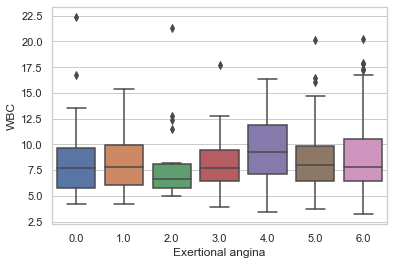

In [192]:
sns.boxplot(y="WBC", x='Exertional angina', data=df)


### Solving null value problem of WBC  column with the help of Exertional angina  Column


In [193]:
df['WBC']=df.groupby(['Exertional angina'])['WBC'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='Gender', ylabel='ESR'>

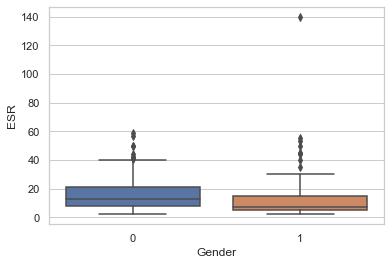

In [194]:
sns.boxplot(y="ESR", x='Gender', data=df)


<AxesSubplot:xlabel='myocardial', ylabel='ESR'>

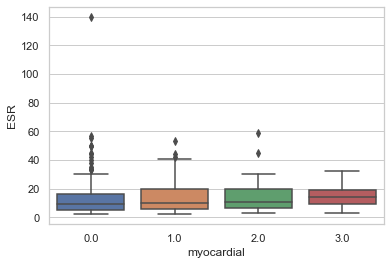

In [195]:
sns.boxplot(y="ESR", x='myocardial', data=df)


### Solving null value problem of ESR  column with the help of myocardial and Gender  Column


In [196]:
df['ESR']=df.groupby(['myocardial','Gender'])['ESR'].transform(lambda x: x.fillna(x.median()))


<AxesSubplot:xlabel='FC', ylabel='Time'>

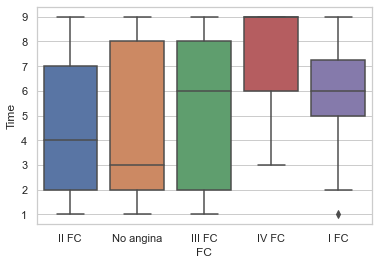

In [197]:
sns.boxplot(y="Time", x='FC', data=df)


<AxesSubplot:xlabel='Duration', ylabel='Time'>

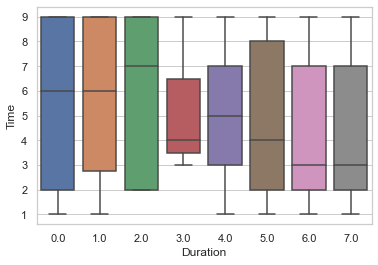

In [198]:
sns.boxplot(y="Time", x='Duration', data=df)


### Solving null value problem of Time  column with the help of Duration Column


In [199]:
df['Time']=df.groupby(['Duration'])['Time'].transform(lambda x: x.fillna(x.median()))
aa=df
c=aa

### Removing variables that we created for temporary purpose

In [200]:
c=c.drop(['Output','temp','HYPER'],axis=1)

In [201]:
columns= ['FC','Heart Disease','Hypertension','Symptomatic hypertension']

for col in columns:
    one_hot=pd.get_dummies(c[col])
    one_hot = one_hot.add_prefix(col)
    c=c.drop(col,axis=1)
    c=c.join(one_hot)

c.head()


,Age,Gender,myocardial,Exertional angina,Duration,Arrhythmia,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,...,FCNo angina,Heart DiseaseExertional angina,Heart DiseaseNo angina,Heart DiseaseUnstable angina,HypertensionNo,HypertensionStage 1,HypertensionStage 2,HypertensionStage 3,Symptomatic hypertensionNo,Symptomatic hypertensionYes
0,63.0,1,0.0,2.0,7.0,0,130.0,80,4.5,134.0,...,0,1,0,0,1,0,0,0,1,0
1,70.0,1,1.0,0.0,6.0,0,120.0,80,4.1,136.0,...,0,1,0,0,0,0,1,0,1,0
2,50.0,1,0.0,6.0,5.0,0,140.0,80,4.8,140.0,...,1,0,1,0,0,0,1,0,1,0
3,63.0,1,1.0,4.0,7.0,0,70.0,40,5.0,146.0,...,0,1,0,0,1,0,0,0,1,0
4,74.0,0,1.0,3.0,2.0,0,120.0,80,4.1,136.0,...,0,1,0,0,0,0,1,0,1,0


In [202]:
x_test=c

In [203]:
x_test.shape

(425, 29)

In [204]:
x_test.isna().sum()

Age                               0
Gender                            0
myocardial                        0
Exertional angina                 0
Duration                          0
Arrhythmia                        0
Systolic_intensive_care           0
Diastolic_intensive_care          0
Potassium                         0
Sodium                            0
AlAT                              0
AsAT                              0
WBC                               0
ESR                               0
Time                              0
FCI FC                            0
FCII FC                           0
FCIII FC                          0
FCIV FC                           0
FCNo angina                       0
Heart DiseaseExertional angina    0
Heart DiseaseNo angina            0
Heart DiseaseUnstable angina      0
HypertensionNo                    0
HypertensionStage 1               0
HypertensionStage 2               0
HypertensionStage 3               0
Symptomatic hypertensionNo  

In [205]:
y_pred=gbrt.predict(x_test)
y_pred


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,